In [1]:
import rasterio
from rasterio.windows import Window
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with rasterio.open('out_raster/classifiy_green_6.tif') as dataset:
    vari = dataset.read(1).astype(np.float32)
    height, width = dataset.height, dataset.width
    meta = dataset.meta

(array([1.45619344e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.36320000e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.78239390e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.59644870e+07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

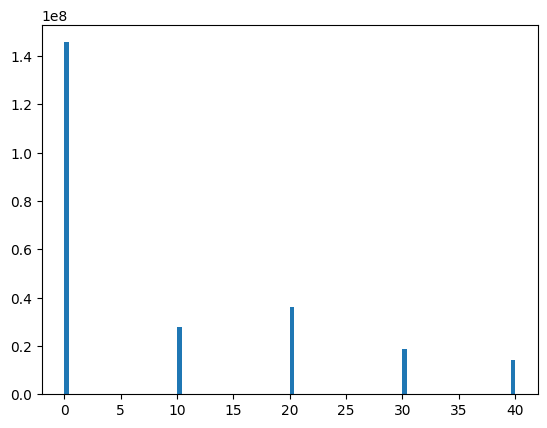

In [22]:
plt.hist(vari.flatten(), bins=100)

In [33]:
# Define the grid size (default 5x5)
grid_size = (20, 20)
# Calculate the number of grids
n_rows, n_cols = dataset.shape
n_grid_rows, n_grid_cols = n_rows // grid_size[0], n_cols // grid_size[1]

# Create empty grids to store means
grid_means = np.zeros((n_grid_rows, n_grid_cols))

In [34]:
# Loop through each grid and calculate the mean
for i in range(n_grid_rows):
    for j in range(n_grid_cols):
        # Get the sub-array for the current grid
        sub_array = vari[i*grid_size[0]:(i+1)*grid_size[0], j*grid_size[1]:(j+1)*grid_size[1]]
        
        # Calculate the mean of the sub-array
        grid_means[i, j] = np.max(sub_array)

# Print the grid means
#print(grid_means)

In [35]:
np.mean(grid_means)

14.370306038047973

In [36]:
# Resize the grid means to match the original raster dimensions
grid_means_resized = np.kron(grid_means, np.ones(grid_size))

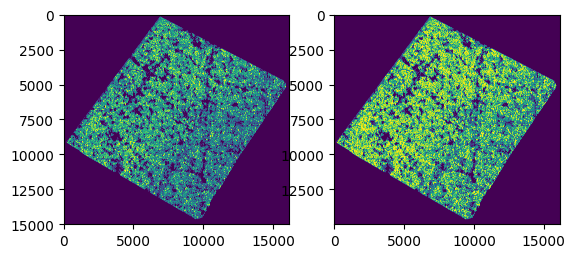

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(vari)
ax2.imshow(grid_means_resized)

(array([1.290204e+08, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        6.160000e+04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.056880e+07, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.217480e+07, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

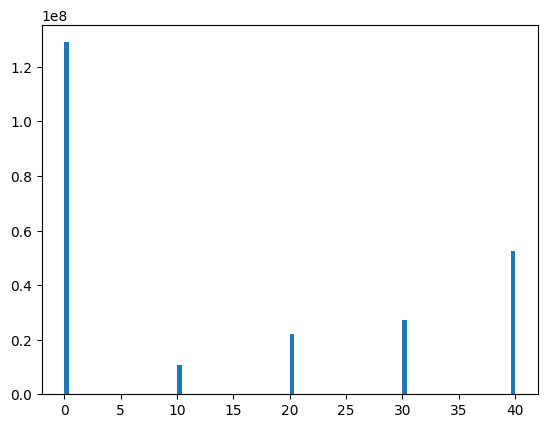

In [37]:
plt.hist(grid_means_resized.flatten(), bins=100)

In [ ]:
plt.imshow(grid_means_resized)

In [ ]:
np.max(grid_means_resized)

In [ ]:
eq = grid_means_resized

In [10]:
nitrogen_index = np.zeros(vari.shape, dtype=np.float32)

In [11]:
from scipy import ndimage as nd

In [14]:
no_vegetation = (vari < 0.00)
nitrogen20 = (vari > 0.010) & (vari <= 0.15)
nitrogen40 = (vari > 0.15) & (vari <= 0.25)
nitrogen60 = (vari > 0.25) & (vari <= 0.35)
nitrogen80 = (vari > 0.35) & (vari <= 1)

In [ ]:
nit = np.zeros(grid_means_resized.shape, dtype=np.float32)

In [ ]:
no_vegetation

In [ ]:
nit[no_vegetation] = 1
nit[nitrogen20] = 10
nit[nitrogen40] = 20
nit[nitrogen60] = 30
nit[nitrogen80] = 40
plt.imshow(nit)

In [17]:
#grid size for morphology
x = 3
y = 3

#Apply morphology to the raster
# no_vegetation_open = nd.binary_opening(no_vegetation, np.ones((x,y)))
# no_vegetation_close = nd.binary_closing(no_vegetation_open, np.ones((x,y)))

nitrogen20_open = nd.binary_opening(nitrogen20, np.ones((x,y)))
nitrogen20_close = nd.binary_closing(nitrogen20_open, np.ones((x,y)))

nitrogen40_open = nd.binary_opening(nitrogen40, np.ones((x,y)))
nitrogen40_close = nd.binary_closing(nitrogen40_open, np.ones((x,y)))
                                                  
nitrogen60_open = nd.binary_opening(nitrogen60, np.ones((x,y)))
nitrogen60_close = nd.binary_closing(nitrogen60_open, np.ones((x,y)))

nitrogen80_open = nd.binary_opening(nitrogen80, np.ones((x,y)))
nitrogen80_close = nd.binary_closing(nitrogen80_open, np.ones((x,y)))

In [18]:
nitrogen_index[no_vegetation] = 1
nitrogen_index[nitrogen20_close] = 10
nitrogen_index[nitrogen40_close] = 20
nitrogen_index[nitrogen60_close] = 30
nitrogen_index[nitrogen80_close] = 40

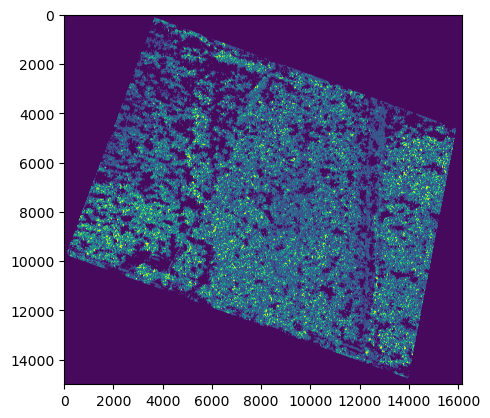

In [19]:
plt.imshow(nitrogen_index) #5x5

In [ ]:
plt.imshow(nitrogen_index) #3x3

In [ ]:
plt.imshow(grid_means_resized, cmap='YlOrRd')

In [38]:
#Export to a new raster
meta.update(
    dtype=rasterio.float32,  # Update the data type to match the VARI data
    count=1,  # Only one band for VARI
    compress='lzw',  # You can choose a compression method if needed
    tiled=False,
    blockysize=1,
    nodata=0.0
)

In [40]:
# Create the new raster TIF file-1
with rasterio.open('out_raster/means_green_4.tif', 'w', **meta) as dst:
    dst.write(grid_means_resized, 1)